In [ ]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

import time


vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# Map for readable classnames
class_names = ["Negative", "Positive"]

In [ ]:
# Get the word index from the dataset
word_index = tf.keras.datasets.imdb.get_word_index()

# Ensure that "special" words are mapped into human readable terms 
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
# Concatonate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[60]))
print("  Review Sentiment: " + str(y_train[60]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[60]))
print("  Review Sentiment: " + class_names[y_train[60]])

Maximum review length: 2494
Minimum review length: 7
Mean review length: 234.75892

Machine readable Review
  Review Text: [1, 13, 219, 14, 33, 4, 2, 22, 1413, 12, 16, 373, 175, 2711, 1115, 1026, 430, 939, 16, 23, 2444, 25, 43, 697, 89, 12, 16, 170, 8, 130, 262, 19, 32, 4, 665, 7, 4, 2, 322, 5, 4, 1520, 7, 4, 86, 250, 10, 10, 4, 249, 173, 16, 4, 3891, 6, 19, 4, 167, 564, 5, 564, 1325, 36, 805, 8, 216, 638, 17, 2, 21, 25, 100, 376, 507, 4, 2110, 15, 79, 125, 23, 567, 13, 2134, 233, 36, 4852, 2, 5, 81, 1672, 10, 10, 92, 437, 129, 58, 13, 69, 8, 401, 61, 1432, 39, 1286, 46, 7, 12]
  Review Sentiment: 0

Human Readable Review
  Review Text: <START> i saw this at the <UNKNOWN> film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the q a with the director writer and writer producer they tried to come across as <UNKNOWN> 

In [ ]:
# The length of reviews
review_length = 500

# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

# Note padding is added to start of review, not the end
print("")
print("Human Readable Review Text (post padding): " + decode_review(x_train[60]))

Shape Training Review Data: (25000, 500)
Shape Training Class Data: (25000,)
Shape Test Review Data: (25000, 500)
Shape Test Class Data: (25000,)

Human Readable Review Text (post padding): <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

**RNN Experiment**

In [ ]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size,
        output_dim = 32,
        input_length = review_length
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.SimpleRNN(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid' 
    )
)
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
train_history = model.fit(x_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/10
625/625 - 353s - loss: 0.6049 - accuracy: 0.6521 - val_loss: 0.4378 - val_accuracy: 0.8078
Epoch 2/10
625/625 - 352s - loss: 0.3836 - accuracy: 0.8364 - val_loss: 0.3701 - val_accuracy: 0.8508
Epoch 3/10
625/625 - 354s - loss: 0.3178 - accuracy: 0.8731 - val_loss: 0.4057 - val_accuracy: 0.8464
Epoch 4/10
625/625 - 350s - loss: 0.3510 - accuracy: 0.8446 - val_loss: 0.4302 - val_accuracy: 0.8358
Epoch 5/10
625/625 - 352s - loss: 0.2958 - accuracy: 0.8711 - val_loss: 0.6841 - val_accuracy: 0.6686
Epoch 6/10
625/625 - 350s - loss: 0.2034 - accuracy: 0.9186 - val_loss: 0.5261 - val_accuracy: 0.8062
Epoch 7/10
625/625 - 357s - loss: 0.1055 - accuracy: 0.9627 - val_loss: 0.6552 - val_accuracy: 0.7872
Epoch 8/10
625/625 - 353s - loss: 0.0727 - accuracy: 0.9756 - val_loss: 0.6594 - val_accuracy: 0.7994
Epoch 9/10
625/625 - 350s - loss: 0.0633 - accuracy: 0.9776 - val_loss: 0.6784 - val_accuracy: 0.8188
Epoch 10/10
625/625 - 347s - loss: 0.0500 - accuracy: 0.9823 - val_loss: 0.7604 - 

<Figure size 432x288 with 0 Axes>

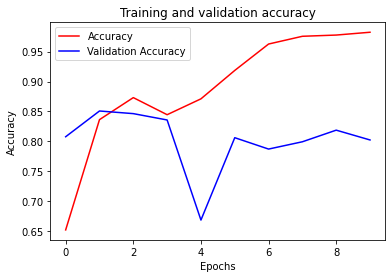

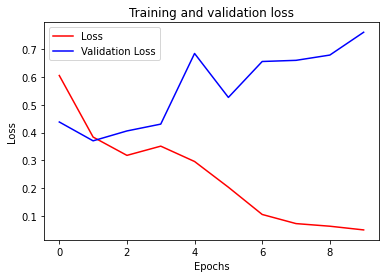

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=train_history.history['accuracy']
val_acc=train_history.history['val_accuracy']
loss=train_history.history['loss']
val_loss=train_history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()

In [ ]:
start = time.time()
scores = model.evaluate(x_test, y_test, verbose=1)
stop = time.time()
print(f"Evaluation time: {stop - start}s")
print("Test Accuracy: ", scores[1])
print("Test Loss: ", scores[0])

782/782 [==============================] - 41s 52ms/step - loss: 0.7713 - accuracy: 0.7990
Evaluation time: 40.91284155845642s
Test Accuracy:  0.7990400195121765
Test Loss:  0.771346390247345


**GRU Experiment**

In [ ]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size,
        output_dim = 32,
        input_length = review_length
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.GRU(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid' 
    )
)
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
train_history = model.fit(x_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/10
625/625 - 64s - loss: 0.4911 - accuracy: 0.7479 - val_loss: 0.3902 - val_accuracy: 0.8390
Epoch 2/10
625/625 - 62s - loss: 0.2681 - accuracy: 0.8945 - val_loss: 0.3409 - val_accuracy: 0.8596
Epoch 3/10
625/625 - 61s - loss: 0.1907 - accuracy: 0.9290 - val_loss: 0.3177 - val_accuracy: 0.8700
Epoch 4/10
625/625 - 61s - loss: 0.1529 - accuracy: 0.9455 - val_loss: 0.3433 - val_accuracy: 0.8660
Epoch 5/10
625/625 - 62s - loss: 0.1252 - accuracy: 0.9552 - val_loss: 0.3418 - val_accuracy: 0.8782
Epoch 6/10
625/625 - 62s - loss: 0.0933 - accuracy: 0.9697 - val_loss: 0.4489 - val_accuracy: 0.8690
Epoch 7/10
625/625 - 62s - loss: 0.0735 - accuracy: 0.9754 - val_loss: 0.4632 - val_accuracy: 0.8738
Epoch 8/10
625/625 - 62s - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.4740 - val_accuracy: 0.8776
Epoch 9/10
625/625 - 62s - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.5118 - val_accuracy: 0.8378
Epoch 10/10
625/625 - 62s - loss: 0.0426 - accuracy: 0.9850 - val_loss: 0.5497 - val_accura

<Figure size 432x288 with 0 Axes>

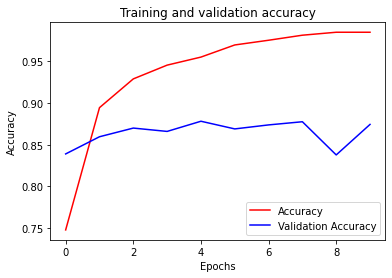

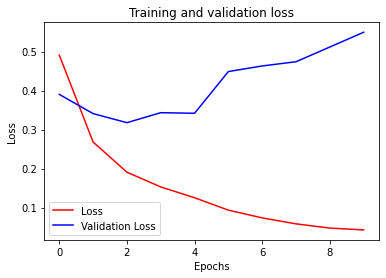

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=train_history.history['accuracy']
val_acc=train_history.history['val_accuracy']
loss=train_history.history['loss']
val_loss=train_history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()

In [ ]:
start = time.time()
scores = model.evaluate(x_test, y_test, verbose=1)
stop = time.time()
print(f"Evaluation time: {stop - start}s")
print("Test Accuracy: ", scores[1])
print("Test Loss: ", scores[0])

782/782 [==============================] - 23s 29ms/step - loss: 0.6170 - accuracy: 0.8603
Evaluation time: 41.4246289730072s
Test Accuracy:  0.8602799773216248
Test Loss:  0.6169819235801697


**LSTM Experiment**

In [ ]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size,
        output_dim = 32,
        input_length = review_length
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.LSTM(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid' 
    )
)
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
train_history = model.fit(x_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/10
625/625 - 64s - loss: 0.4664 - accuracy: 0.7710 - val_loss: 0.5479 - val_accuracy: 0.7108
Epoch 2/10
625/625 - 62s - loss: 0.3105 - accuracy: 0.8748 - val_loss: 0.3295 - val_accuracy: 0.8678
Epoch 3/10
625/625 - 62s - loss: 0.2109 - accuracy: 0.9211 - val_loss: 0.3458 - val_accuracy: 0.8724
Epoch 4/10
625/625 - 62s - loss: 0.1652 - accuracy: 0.9410 - val_loss: 0.3362 - val_accuracy: 0.8720
Epoch 5/10
625/625 - 61s - loss: 0.1431 - accuracy: 0.9493 - val_loss: 0.3640 - val_accuracy: 0.8708
Epoch 6/10
625/625 - 61s - loss: 0.1320 - accuracy: 0.9518 - val_loss: 0.4085 - val_accuracy: 0.8656
Epoch 7/10
625/625 - 62s - loss: 0.1022 - accuracy: 0.9643 - val_loss: 0.4277 - val_accuracy: 0.8686
Epoch 8/10
625/625 - 61s - loss: 0.0945 - accuracy: 0.9683 - val_loss: 0.4985 - val_accuracy: 0.8592
Epoch 9/10
625/625 - 61s - loss: 0.0907 - accuracy: 0.9682 - val_loss: 0.4488 - val_accuracy: 0.8562
Epoch 10/10
625/625 - 61s - loss: 0.0776 - accuracy: 0.9742 - val_loss: 0.5249 - val_accura

<Figure size 432x288 with 0 Axes>

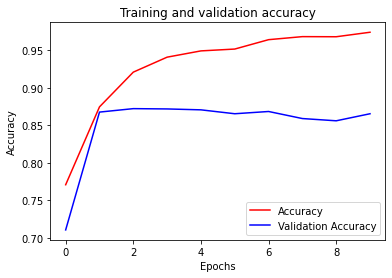

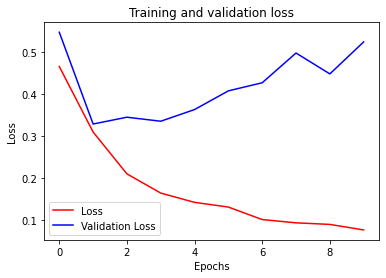

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=train_history.history['accuracy']
val_acc=train_history.history['val_accuracy']
loss=train_history.history['loss']
val_loss=train_history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()

In [ ]:
start = time.time()
scores = model.evaluate(x_test, y_test, verbose=1)
stop = time.time()
print(f"Evaluation time: {stop - start}s")
print("Test Accuracy: ", scores[1])
print("Test Loss: ", scores[0])

782/782 [==============================] - 22s 29ms/step - loss: 0.5498 - accuracy: 0.8547
Evaluation time: 22.389317512512207s
Test Accuracy:  0.8546800017356873
Test Loss:  0.5498093962669373


**Bidirectional LSTM**

In [ ]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size,
        output_dim = 32,
        input_length = review_length
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))
)

model.add(
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid' 
    )
)
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 128)          49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 468,609
Trainable params: 468,609
Non-trainable params: 0
________________________________________________

In [ ]:
start = time.time()
train_history = model.fit(x_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/10
625/625 - 305s - loss: 0.4515 - accuracy: 0.7883 - val_loss: 0.3426 - val_accuracy: 0.8596
Epoch 2/10
625/625 - 299s - loss: 0.2638 - accuracy: 0.8979 - val_loss: 0.3298 - val_accuracy: 0.8736
Epoch 3/10
625/625 - 301s - loss: 0.1929 - accuracy: 0.9293 - val_loss: 0.3161 - val_accuracy: 0.8748
Epoch 4/10
625/625 - 302s - loss: 0.1420 - accuracy: 0.9507 - val_loss: 0.3348 - val_accuracy: 0.8746
Epoch 5/10
625/625 - 301s - loss: 0.1146 - accuracy: 0.9609 - val_loss: 0.3936 - val_accuracy: 0.8736
Epoch 6/10
625/625 - 304s - loss: 0.0954 - accuracy: 0.9678 - val_loss: 0.4264 - val_accuracy: 0.8400
Epoch 7/10
625/625 - 303s - loss: 0.0741 - accuracy: 0.9746 - val_loss: 0.4271 - val_accuracy: 0.8622
Epoch 8/10
625/625 - 304s - loss: 0.0645 - accuracy: 0.9791 - val_loss: 0.5328 - val_accuracy: 0.8596
Epoch 9/10
625/625 - 304s - loss: 0.0536 - accuracy: 0.9821 - val_loss: 0.6242 - val_accuracy: 0.8608
Epoch 10/10
625/625 - 304s - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.5283 - 

<Figure size 432x288 with 0 Axes>

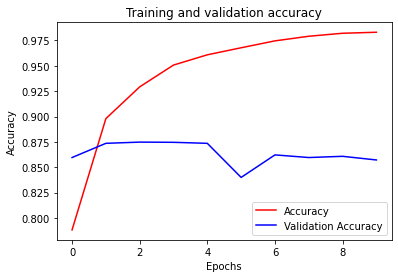

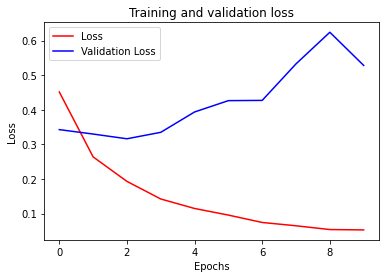

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=train_history.history['accuracy']
val_acc=train_history.history['val_accuracy']
loss=train_history.history['loss']
val_loss=train_history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()

In [ ]:
start = time.time()
scores = model.evaluate(x_test, y_test, verbose=1)
stop = time.time()
print(f"Evaluation time: {stop - start}s")
print("Test Accuracy: ", scores[1])
print("Test Loss: ", scores[0])

782/782 [==============================] - 135s 173ms/step - loss: 0.5528 - accuracy: 0.8505
Evaluation time: 141.96383547782898s
Test Accuracy:  0.8505200147628784
Test Loss:  0.5528090000152588
